# Critical curve of a Kerr black hole onto the EHT image of M87*

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.3.beta7, Release Date: 2021-02-07'

In [2]:
%display latex

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Functions $\ell_{\rm c}(r_0)$ and $q_{\rm c}(r_0)$ for critical null geodesics

We use $m=1$ and denote $r_0$ simply by $r$.

In [4]:
a, r = var('a r') 

In [5]:
lsph(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
lsph

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [6]:
qsph(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
qsph

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

The radii $r_+$ and $r_-$ of the two horizons:

In [7]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)

## Critical radii $r_{\rm ph}^{**}$, $r_{\rm ph}^*$, $r_{\rm ph}^+$, $r_{\rm ph}^-$, $r_{\rm ph}^{\rm ms}$ and $r_{\rm ph}^{\rm pol}$ 

In [8]:
rph_ss(a) = 1/2 + cos(2/3*asin(a) + 2*pi/3)
rph_ss

a |--> cos(2/3*pi + 2/3*arcsin(a)) + 1/2

In [9]:
rph_s(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rph_s

a |--> 4*cos(4/3*pi + 1/3*arccos(-a))^2

In [10]:
rph_p(a) = 4*cos(acos(-a)/3)^2
rph_p

a |--> 4*cos(1/3*arccos(-a))^2

In [11]:
rph_m(a) = 4*cos(acos(a)/3)^2
rph_m

a |--> 4*cos(1/3*arccos(a))^2

We add the radius of the marginally stable orbit:

In [12]:
rph_ms(a) = 1 - (1 - a^2)^(1/3)
rph_ms

a |--> -(-a^2 + 1)^(1/3) + 1

as well as the radius of outer and inner polar orbits:

In [13]:
rph_pol(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)))
rph_pol

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(1/3*arccos(-(a^2 - 1)/(-1/3*a^2 + 1)^(3/2))) + 1

In [14]:
rph_pol_in(a) = 1 + 2*sqrt(1 - a^2/3)*cos(1/3*arccos((1 - a^2)/(1 - a^2/3)^(3/2)) + 2*pi/3)
rph_pol_in

a |--> 2*sqrt(-1/3*a^2 + 1)*cos(2/3*pi + 1/3*arccos(-a^2/(-1/3*a^2 + 1)^(3/2) + 1/(-1/3*a^2 + 1)^(3/2))) + 1

In [15]:
a0 = 0.95
# a0 = 1
show(LatexExpr(r'r_{\rm ph}^{**} = '), n(rph_ss(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm ms} = '), n(rph_ms(a0)))
show(LatexExpr(r'r_{\rm ph}^{*} = '), n(rph_s(a0)))
show(LatexExpr(r'r_- = '), n(rm(a0)))
show(LatexExpr(r'r_+ = '), n(rp(a0)))
show(LatexExpr(r'r_{\rm ph}^+ = '), n(rph_p(a0)))
show(LatexExpr(r'r_{\rm ph}^- = '), n(rph_m(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm pol} = '), n(rph_pol(a0)))
show(LatexExpr(r'r_{\rm ph}^{\rm pol,in} = '), n(rph_pol_in(a0)))

r_{\rm ph}^{**} =  -0.477673658836338

r_{\rm ph}^{\rm ms} =  0.539741795874205

r_{\rm ph}^{*} =  0.658372153864346

r_- =  0.687750100080080

r_+ =  1.31224989991992

r_{\rm ph}^+ =  1.38628052846298

r_{\rm ph}^- =  3.95534731767268

r_{\rm ph}^{\rm pol} =  2.49269429554008

r_{\rm ph}^{\rm pol,in} =  -0.399338575773941

In [16]:
def alpha(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
    else:
        ell = lsph(a, r0)
    return - ell / sin(th_obs)

def Theta(a, th_obs, r0):
    if a == 1:
        ell = - r0^2 + 2*r0 + 1
        q = r0^3 * (4 - r0)
    else:
        ell = lsph(a, r0)
        q = qsph(a, r0)
    return q + cos(th_obs)^2 * (a^2 - ell^2/sin(th_obs)^2)

def beta(a, th_obs, r0, eps_theta=1):
    return eps_theta * sqrt(Theta(a, th_obs, r0,))

In [17]:
def r0_bounds(a, th_obs, outer=True):
    r"""
    Return `(r0_min, r0_max)`
    """
    if outer:
        r1 = n(rph_p(a))
        r2 = n(rph_m(a))
        r3 = rph_pol(a)
    else:
        r1 = n(rph_ss(a))
        r2 = 0
        r3 = rph_pol_in(a)
    #
    # Computation of rmin:
    try:
        if a == 1:
            th_crit = n(asin(sqrt(3) - 1))
            if n(th_obs) < th_crit or n(th_obs) > n(pi) - th_crit:
                rmin = find_root(lambda r: Theta(a, th_obs, r), r1, r3)
            else:
                rmin = 1
        else:
            rmin = find_root(lambda r: Theta(a, th_obs, r), r1, r3)
    except TypeError:  # special case th_obs = pi/2
        rmin = r1    
    #
    # Computation of rmax:
    try:
        rmax = find_root(lambda r: Theta(a, th_obs, r), r3, r2)
    except TypeError:  # special case th_obs = pi/2
        rmax = r2    
    #
    return (rmin, rmax)

In [18]:
def shadow_plot(a, th_obs, orientation=0, outer=True, color=None, number_colors=5, 
                range_col=None, thickness=2, linestyle='-', plot_points=200,
                legend='automatic', legend_loc=(1.02, 0.36), fill=True, 
                fillcolor='grey', draw_NHEKline=True, 
                draw_spin=False, spin_arrow_length=7, spin_arrow_options=None,
                frame=True, axes=True, axes_labels='automatic', gridlines=True):
    if a==0:
        # Case a = 0:
        rs = 3*sqrt(3)
        if color is None:
            color = 'black'
        if legend == 'automatic':
            legend = None
        g = parametric_plot((rs*cos(x), rs*sin(x)), (x, 0, 2*pi), 
                            color=color, thickness=thickness,
                            linestyle=linestyle, legend_label=legend, 
                            fill=fill, fillcolor=fillcolor, frame=frame, 
                            axes=axes, gridlines=gridlines)
    else:
        # Case a != 0
        rmin, rmax = r0_bounds(a, th_obs, outer=outer)
        if rmin > 0:
            rmin = 1.00000001*rmin
            rmax = 0.99999999*rmax
        else:
            rmin = 0.9999999*rmin
            rmax = 1.0000001*rmax
        print("rmin : ", rmin, "  rmax : ", rmax)
        co = cos(orientation)
        so = sin(orientation)
        fa = lambda r: co*alpha(a, th_obs, r) - so*beta(a, th_obs, r)
        fb = lambda r: so*alpha(a, th_obs, r) + co*beta(a, th_obs, r)
        fam = lambda r: co*alpha(a, th_obs, r) - so*beta(a, th_obs, r, eps_theta=-1)
        fbm = lambda r: so*alpha(a, th_obs, r) + co*beta(a, th_obs, r, eps_theta=-1)
        if range_col is None:
            range_col = r0_bounds(a, pi/2, outer=outer)
        rmin_col, rmax_col = range_col 
        print("rmin_col : ", rmin_col, "  rmax_col : ", rmax_col)
        dr = (rmax_col - rmin_col) / number_colors
        rm = rmin_col + int((rmin - rmin_col)/dr)*dr
        r1s = rmin
        r_ranges = []
        while rm + dr < rmax:
            col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
            r2s = rm + dr
            r_ranges.append((r1s, r2s, col))
            rm += dr
            r1s = r2s
        if color is None:
            col = hue((rm - rmin_col)/(rmax_col - rmin_col + 0.1))
        else:
            col = color
        r_ranges.append((r1s, rmax, col))
        g = Graphics()
        legend_label = None  # a priori
        if a == 1 and draw_NHEKline:
            th_crit = asin(sqrt(3) - 1)
            if th_obs > th_crit and th_obs < pi - th_crit:
                # NHEK line
                alpha0 = -2/sin(th_obs)
                beta0 = sqrt(3 - cos(th_obs)**2 *(6 + cos(th_obs)**2))/sin(th_obs)
                alpha1 = co*alpha0 - so*beta0
                beta1 = so*alpha0 + co*beta0
                alpha2 = co*alpha0 + so*beta0
                beta2 = so*alpha0 - co*beta0
                if legend == 'automatic':
                    legend_label = r"$r_0 = m$"
                if color is None:
                    colNHEK = 'maroon'
                else:
                    colNHEK = color
                g += line([(alpha1, beta1), (alpha2, beta2)], color=colNHEK, 
                          thickness=thickness, linestyle=linestyle,
                          legend_label=legend_label)
                if fill:
                    g += polygon2d([(fa(rmax), 0), (alpha0, beta0), (alpha0, -beta0)], 
                                   color=fillcolor, alpha=0.5)
        for rg in r_ranges:
            r1s, r2s = rg[0], rg[1]
            col = rg[2]
            if legend:
                if legend == 'automatic':
                    if draw_NHEKline and abs(r1s - 1) < 1e-5:
                        legend_label = r"${:.2f}\, m < r_0 \leq {:.2f}\, m$".format(
                                       float(r1s), float(r2s))
                    else:
                        legend_label = r"${:.2f}\, m \leq r_0 \leq {:.2f}\, m$".format(
                                       float(r1s), float(r2s))
                else:
                    legend_label = legend
            g += parametric_plot((fa, fb), (r1s, r2s), plot_points=plot_points, color=col, 
                                 thickness=thickness, linestyle=linestyle,
                                 legend_label=legend_label, 
                                 frame=frame, axes=axes, gridlines=gridlines)
            g += parametric_plot((fam, fbm), (r1s, r2s), plot_points=plot_points, color=col, 
                                 thickness=thickness, linestyle=linestyle)
        if fill:
            g += parametric_plot((fa, fb), (rmin, rmax), fill=True, fillcolor=fillcolor, 
                                 thickness=0)
            g += parametric_plot((fam, fbm), (rmin, rmax), fill=True, fillcolor=fillcolor, 
                                 thickness=0)
        if draw_spin:
            if not spin_arrow_options:
                spin_arrow_options = {}
            if 'color' not in spin_arrow_options:
                spin_arrow_options['color'] = color
            g += arrow2d((0,0), (-so*spin_arrow_length, co*spin_arrow_length), 
                         **spin_arrow_options)
        # end of case a != 0
    g.set_aspect_ratio(1)
    if axes_labels:
        if axes_labels == 'automatic':
            g.axes_labels([r"$(r_{\mathscr{O}}/m)\; \alpha$", 
                           r"$(r_{\mathscr{O}}/m)\; \beta$"])
        else:
            g.axes_labels(axes_labels)
    if legend:
        g.set_legend_options(handlelength=2, loc=legend_loc)
    return g

rmin :  1.00000001000000   rmax :  3.99999996000000
rmin_col :  1   rmax_col :  4.0


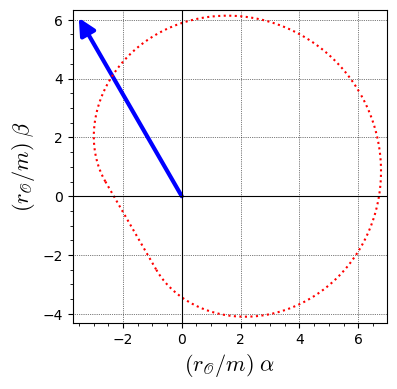

In [19]:
shadow_plot(1, pi/2, orientation=pi/6, fill=False, color='red', 
            number_colors=1, thickness=1.5, linestyle=':', 
            draw_spin=True, spin_arrow_options={'color': 'blue', 'width': 3},
            legend=False)

Half-width of the image in units of $m/r_{\mathscr{O}}$:

In [20]:
EHT_field_of_view = 127   # Field of view for EHT image of M87* (in microarcseconds)
scale_M87 = 3.66467403690525  # m/r for M87* (in microarcseconds)
fsize = EHT_field_of_view / 2 / scale_M87
extent = (-fsize, fsize, -fsize, fsize)
print("fsize =", fsize, "m/r_obs")

fsize = 17.3275984058939 m/r_obs


In [21]:
def empty_plot(size, frame=True, axes=False, axes_labels='automatic', 
               gridlines=False):
    g = Graphics()
    g._extra_kwds['frame'] = frame
    g._extra_kwds['axes'] = axes
    g._extra_kwds['gridlines'] = gridlines
    if axes_labels:
        if axes_labels == 'automatic':
            g.axes_labels([r"$(r_{\mathscr{O}}/m)\; \alpha$", 
                           r"$(r_{\mathscr{O}}/m)\; \beta$"])
        else:
            g.axes_labels(axes_labels)
    g.set_aspect_ratio(1)
    g.set_axes_range(-size, size, -size, size)
    return g

Default resolution of SageMath images:

In [22]:
dpi = Graphics.SHOW_OPTIONS['dpi']
dpi

100

Default resolution of Matplotlib images:

In [23]:
from matplotlib import rcParams
rcParams['figure.dpi']

72.0

The inclination of the jet axis with respect to the line of sight is $\iota = 17^\circ$ and its orientation
is $\Theta = -72^\circ$ from the North axis. We have $\theta_{\mathscr{O}} = \iota$ or $\theta_{\mathscr{O}}  = \pi - \iota$. Assuming that the emitting matted in the EHT image rotates in the same direction as the black hole implies $\theta_{\mathscr{O}} = \pi - \iota$:

In [29]:
inc_jet = 17.  # inclination of jet axis w.r.t. line of sight (in degrees)
Theta_jet = -72.   # orientation of jet axis in the plane of sky (in degress)
th_obs = (180. - inc_jet)/180.*pi
orient = (180. + Theta_jet)/180.*pi
image_parameters = [(0, th_obs, orient, ''), (1., th_obs, orient, 'green')]

In [25]:
gimage = 'M87_EHT'

M87_EHT  resolution: (474, 474, 4)
figsize:  (4.74, 4.74)
a/m = 0   theta_obs = 0.905555555555556*pi
a/m = 1.00000000000000   theta_obs = 0.905555555555556*pi
rmin :  1.89727388775268   rmax :  2.90008539695632
rmin_col :  1   rmax_col :  4.0


<IPython.core.display.Javascript object>


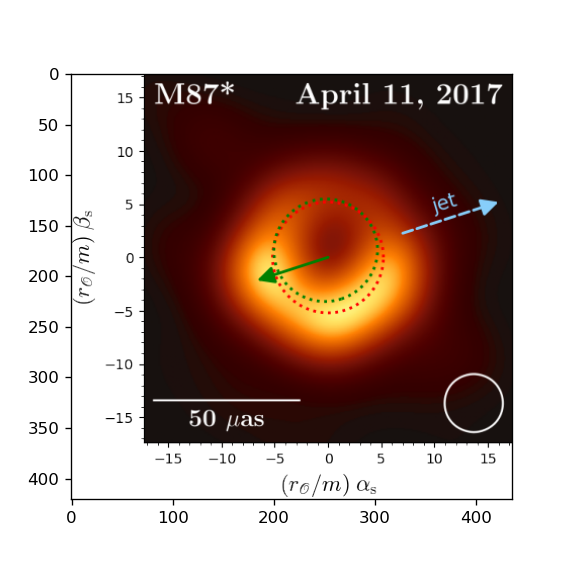

In [30]:
%display plain
%matplotlib notebook
frame = True
axes_labels = [r"$(r_{\mathscr{O}}/m)\; \alpha_{\rm s}$", 
               r"$(r_{\mathscr{O}}/m)\; \beta_{\rm s}$"]
test_size = False
raw = False
img = mpimg.imread(gimage + '.png')
print(gimage, " resolution:", img.shape)
# size of the image in inches:
figsize = (float(img.shape[0])/dpi, float(img.shape[1])/dpi)
print("figsize: ", figsize)
gcrit = Graphics()
for a0, th_obs, orient, color in image_parameters:
    print("a/m =", a0, "  theta_obs =", th_obs)
    # Critical curve as a SageMath graphics object from shadow_plot
    if th_obs == 0:
        th_obs = 0.001
    if not raw:
        g0 = shadow_plot(a0, th_obs, orientation=orient, fill=False, 
                         color=color, number_colors=1, thickness=2., 
                         linestyle=':', draw_spin=True,
                         frame=frame, axes=False, 
                         axes_labels=axes_labels, gridlines=False, 
                         legend=False)
        gcrit += g0
        gcrit.axes_labels(g0.axes_labels())
    else:
        gcrit += empty_plot(fsize, axes_labels=axes_labels, frame=frame)
    if test_size:
        axes_labels_bck = gcrit.axes_labels()
        gcrit += point((-fsize, 0), size=60, color='red', zorder=100)
        gcrit += point((fsize, 0), size=60, color='red', zorder=100)
        gcrit += point((0, -fsize), size=60, color='red', zorder=100)
        gcrit += point((0, fsize), size=60, color='red', zorder=100)
        gcrit.axes_labels(axes_labels_bck)
# Adding the jet axis
ta = tan((90 + Theta_jet)/180.*pi)
gcrit += arrow2d((7, 7*ta), (16, 16*ta), color='lightskyblue', 
                 linestyle='--', thickness=2)
gcrit += text("jet", (11, 11*ta+1.5), rotation=17, color='lightskyblue',
              fontsize=14)
gcrit.axes_labels(g0.axes_labels())
gcrit.set_axes_range(-fsize, fsize, -fsize, fsize)
# Matplotlib figure corresponding to gcrit:
options = gcrit.SHOW_OPTIONS.copy()
options.update(gcrit._extra_kwds)
options['figsize'] = figsize
options['axes_pad'] = 0
options.pop('dpi')           # strip meaningless options for matplotlib
options.pop('transparent')   #
options.pop('fig_tight')     #
fcrit = gcrit.matplotlib(**options)
# Adding the M87* image onto it:
ax = fcrit.axes[0]
ax.imshow(img, extent=extent)
# Save result to png and pdf
ext = '_raw' if raw else '_crit'
fcrit.savefig(gimage + ext + '.png', dpi=dpi, pad_inches=0, 
              bbox_inches='tight', transparent=True)
fcrit.savefig(gimage + ext + '.pdf', pad_inches=0, 
              bbox_inches='tight')
# Only for display in the current notebook:
fig = plt.figure(figsize=figsize, dpi=dpi, frameon=False)
imgc = mpimg.imread(gimage + '_crit.png')
if axes_labels:
    imgcp = plt.imshow(imgc)
else:
    imgcp = plt.imshow(imgc, extent=extent)